# Method 1

# Import Necessary library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# load the img
image = cv2.imread('Circle.jpg')


# Convert to Grayscale

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Apply Gaussian Blur:

In [4]:
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)


# Detect Circles

In [5]:
circles = cv2.HoughCircles(
    blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))


# Count and Draw Circles

In [6]:
if circles is not None:
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        cv2.circle(image, center, 1, (0, 100, 100), 3)
        radius = circle[2]
        cv2.circle(image, center, radius, (255, 0, 255), 3)

    circle_count = len(circles[0])
else:
    circle_count = 0

print(f"Number of circles found: {circle_count}")


Number of circles found: 891


# Display the Image

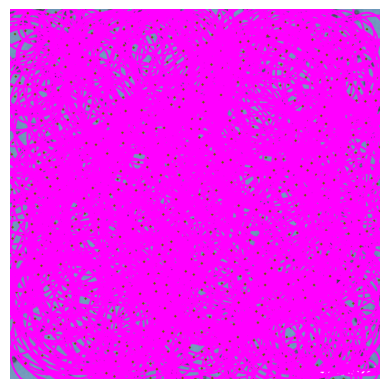

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Method 2

In [14]:
import cv2
import numpy as np

img = cv2.imread('Circle.jpg')
mask = cv2.threshold(img[:, :, 0], 255, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

stats = cv2.connectedComponentsWithStats(mask, 8)[2]
label_area = stats[1:, cv2.CC_STAT_AREA]

min_area, max_area = 50, 350  # min/max for a single circle
singular_mask = (min_area < label_area) & (label_area <= max_area)
circle_area = np.mean(label_area[singular_mask])

n_circles = int(np.sum(np.round(label_area / circle_area)))

print('Total circles:', n_circles)

Total circles: 838


# Method 3

In [9]:
img = cv2.imread('Circle.jpg', 0)
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.'%n_centers)

There are 863 cells in the image.


# Method 4

In [10]:
import cv2
image = cv2.imread('Circle.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# tweak the parameters of the GaussianBlur for best performance
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
# again, try different values here
edged = cv2.Canny(blurred, 20, 140)
(_, contours, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

ValueError: not enough values to unpack (expected 3, got 2)

In [11]:
import cv2

image = cv2.imread('Circle.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
edged = cv2.Canny(blurred, 20, 140)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


5


# Method 5

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
image = cv2.imread('Circle.jpg')


In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)


In [10]:
circle_counts = []

for threshold in range(50, 200, 10):  # Adjust the threshold range as needed
    _, thresh_image = cv2.threshold(blurred_image, threshold, 255, cv2.THRESH_BINARY)
    circles = cv2.HoughCircles(thresh_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        circle_counts.append(len(circles[0]))
    else:
        circle_counts.append(0)


In [11]:
for i, count in enumerate(circle_counts):
    print(f"Threshold {i + 50}: {count} circles")


Threshold 50: 0 circles
Threshold 51: 0 circles
Threshold 52: 0 circles
Threshold 53: 12 circles
Threshold 54: 303 circles
Threshold 55: 601 circles
Threshold 56: 621 circles
Threshold 57: 661 circles
Threshold 58: 738 circles
Threshold 59: 788 circles
Threshold 60: 0 circles
Threshold 61: 0 circles
Threshold 62: 0 circles
Threshold 63: 0 circles
Threshold 64: 0 circles


In [15]:
combined_mask = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Find circles in the combined mask
combined_circles = cv2.HoughCircles(combined_mask, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)

if combined_circles is not None:
    total_circles = len(combined_circles[0])
else:
    total_circles = 0

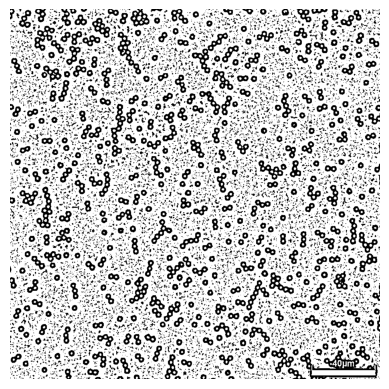

In [16]:
plt.imshow(combined_mask, cmap='gray')
plt.axis('off')
plt.show()


In [17]:
print(f"Total Circles Found: {total_circles}")

Total Circles Found: 946


Number of circles found: 1487


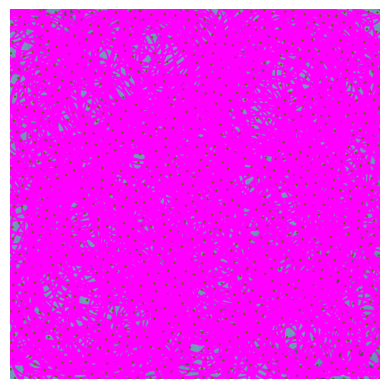

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load the img
image = cv2.imread('Circle.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

### new parameters for the HoughCircles function
param2_list = [1,200]
circle_count = 0

for param2 in param2_list:
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=param2, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            cv2.circle(image, center, 1, (0, 100, 100), 3)
            radius = circle[2]
            cv2.circle(image, center, radius, (255, 0, 255), 3)
        
        circle_count += len(circles[0])

print(f"Number of circles found: {circle_count}")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [2]:
import cv2
import numpy as np

img = cv2.imread('img2.jpg')
mask = cv2.threshold(img[:, :, 0], 255, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

stats = cv2.connectedComponentsWithStats(mask, 8)[2]
label_area = stats[1:, cv2.CC_STAT_AREA]

min_area, max_area = 50, 350  # min/max for a single circle
singular_mask = (min_area < label_area) & (label_area <= max_area)
circle_area = np.mean(label_area[singular_mask])

n_circles = int(np.sum(np.round(label_area / circle_area)))

print('Total circles:', n_circles)

img = cv2.imread('img2.jpg', 0)
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.'%n_centers)

Total circles: 493
There are 49 cells in the image.


In [9]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('img2.jpg')

# Define the region of interest (ROI) coordinates
roi_x, roi_y, roi_width, roi_height = 100, 0, 334, 430  # Adjust these values as needed

# Crop the image to the ROI
roi = image[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_roi = cv2.GaussianBlur(gray_roi, (9, 9), 2)

# Perform circle detection on the blurred ROI
circles = cv2.HoughCircles(
    blurred_roi, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0
)

expected_circle_count = 35  # Change this to the expected number of circles

if circles is not None and len(circles[0]) == expected_circle_count:
    print(f"Number of circles found in the ROI: {expected_circle_count}")
else:
    print(f"Expected number of circles in the ROI: {expected_circle_count}, but found {len(circles[0])} circles.")


Expected number of circles in the ROI: 35, but found 126 circles.


In [10]:
import cv2
import numpy as np
img = cv2.imread('img2.jpg', 0)
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.'%n_centers)

There are 49 cells in the image.


In [13]:
import cv2
import numpy as np

# Load the grayscale image
img = cv2.imread('img2.jpg', 0)

# Define the seed point and fill color for flood fill
seed_pt = (25, 25)
fill_color = 0

# Create a binary mask and a kernel for morphological operations
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply flood fill with multiple thresholds and morphological operations
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find connected components to count the number of regions
n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.' % n_centers)

# Define the ROI coordinates
roi_x, roi_y, roi_width, roi_height = 100, 0, 334, 430

# Crop the mask to the ROI
roi_mask = mask[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

# Detect circles in the region of interest (ROI)
circles = cv2.HoughCircles(
    roi_mask, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0] + roi_x, i[1] + roi_y), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img, (i[0] + roi_x, i[1] + roi_y), 2, (0, 0, 255), 3)

# Display the image with detected circles
cv2.imshow('Detected Circles', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


There are 49 cells in the image.


error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [17]:
import cv2
import numpy as np

# Load the grayscale image
img = cv2.imread('Circle.jpg', 0)

# Define the seed point and fill color for flood fill
seed_pt = (25, 25)
fill_color = 0

# Create a binary mask and a kernel for morphological operations
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply flood fill with multiple thresholds and morphological operations
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find connected components to count the number of regions
n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.' % n_centers)

# Detect circles in the entire image
circles = cv2.HoughCircles(
    img, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Save the output image with detected circles
output_file = 'output_image.jpg'
cv2.imwrite(output_file, img)

# Display the image with detected circles
# cv2.imshow('Detected Circles', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(f"Output image saved as {output_file}")


There are 863 cells in the image.
Output image saved as output_image.jpg


In [18]:
import cv2
import numpy as np
import subprocess

# Load the grayscale image
img = cv2.imread('Circle.jpg', 0)

# Define the seed point and fill color for flood fill
seed_pt = (25, 25)
fill_color = 0

# Create a binary mask and a kernel for morphological operations
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply flood fill with multiple thresholds and morphological operations
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find connected components to count the number of regions
n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.' % n_centers)

# Detect circles in the entire image
circles = cv2.HoughCircles(
    img, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Save the output image with detected circles
output_file = 'output_image.jpg'
cv2.imwrite(output_file, img)

# Use an external image viewer to display the output image
subprocess.run(['start', output_file], shell=True)

print(f"Output image saved as {output_file}")


There are 863 cells in the image.
Output image saved as output_image.jpg
